In [73]:
# import Matplot lib
%matplotlib inline

import matplotlib.pyplot as plt

In [74]:
#Import sklearn metrics being used
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

# linear regression, regression models, preprocessing features used
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import Normalizer, PolynomialFeatures, scale
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVR


import pandas as pd

In [75]:
# Importing the dataset
dataset = pd.read_csv('data/testData4.csv', sep=";")
# print(dataset.describe())

In [76]:
# Do correlation in features:
corrMatrix=dataset.corr()
print corrMatrix

          a         b         c         d         e         t
a  1.000000  0.002834 -0.006016 -0.524714  0.010257  0.576025
b  0.002834  1.000000 -0.011405  0.011185  0.009415 -0.000519
c -0.006016 -0.011405  1.000000 -0.800311  0.001661  0.575946
d -0.524714  0.011185 -0.800311  1.000000  0.257456 -0.624664
e  0.010257  0.009415  0.001661  0.257456  1.000000  0.577690
t  0.576025 -0.000519  0.575946 -0.624664  0.577690  1.000000


In [77]:
# we remove 'c' as d is highly negatively correlated with c
chosen_fields = ['a','b', 'd', 'e']
X = dataset[chosen_fields]
y = dataset[['t']]

# to check p-value and t-values for features to check if they're important
print f_regression(X,y)

# Normalize the input features values
X[chosen_fields] = scale(X)

# Manually Normalize the features; so we can rescale it later

(array([  4.96468380e+03,   2.69550036e-03,   6.39766195e+03,
         5.00783353e+03]), array([ 0.       ,  0.9585949,  0.       ,  0.       ]))


/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [78]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [79]:
# try out different algorithms
# cv = StratifiedKFold(n_folds=5, random_state=0)

regressor_lo = Lasso(alpha=1)

regressor = GradientBoostingRegressor(loss='ls', alpha=0.1,
                                n_estimators=200, max_depth=3,
                                learning_rate=0.01, min_samples_leaf=9,
                                min_samples_split=5)
# Mean squared error: 280752.93
# Variance score: 0.48

regressor_li = LinearRegression()

regressor_ri = Ridge(alpha=1e-2, normalize=True, solver='cholesky')
regressor_svr = SVR(C=1e1, gamma=1e-3, kernel='linear')

In [80]:
regressor.fit(X_train, y_train,)

# Predicting the Test set result
y_pred = regressor.predict(X_test)


# print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Check how well your model fits around mean of 
y_pred_train = regressor.predict(X_train)
print r2_score(y_train, y_pred_train)

/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 2.08
0.921703149413


In [81]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Regressor variables
# print ( "Coefficients :" , regressor.coef_)
# print ("Intercept :" , regressor.intercept_)

Variance score: 0.92


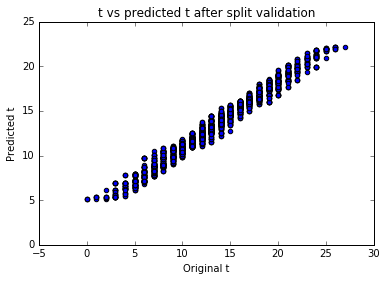

In [84]:
#see the model fit
plt.scatter(y_test, y_pred)
plt.title("t vs predicted t after split validation")
plt.xlabel("Original t")
plt.ylabel("Predicted t")

In [85]:
predicted_df = X_test

predicted_df['t'] = y_test
predicted_df['t_pred'] = y_pred


print predicted_df

             a         b         d         e   t     t_pred
9953  1.417913  0.417321  0.368438 -0.193397  13  12.621423
3850  0.618211  0.870398 -0.002765  0.508079  16  15.258034
4962  1.515089  0.319494 -1.580380 -0.193397  20  18.350718
3886 -0.154112  0.835312  0.090035 -1.596348   7   9.102851
5437  1.079994 -0.532839 -0.188367  1.209554  20  18.419143
8517  1.245791 -1.083293 -1.580380 -0.894872  17  16.317670
2041 -0.553220 -0.665025  0.554040  0.508079  13  13.199672
1989 -0.572060  0.885815 -0.930774 -0.894872  13  12.641308
1933  1.642029 -0.400376 -2.137185 -1.245610  18  15.982035
9984 -0.631728 -0.467783  0.368438  0.858817  15  14.948786
8418  0.265047 -1.225677  0.739641  0.508079  13  13.117355
2418  1.250630 -0.314959  0.739641  1.560292  18  16.258531
6811 -0.724789  0.544011  0.368438  0.157341  12  12.314469
1217  1.713934  0.793554 -0.373969  0.157341  17  16.056532
6978 -1.168942 -1.211089 -0.466770 -1.596348   8  10.475848
6111 -0.983267  1.564308 -0.373969  1.56

/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [86]:
# Save the model to disk - Please see the read.md file to see how to use these models
import pickle
filename = 'models/testData4.model'
pickle.dump(regressor, open(filename, 'wb'))

In [57]:
# To predict a new file use this - regressor.predict(data)